# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [0]:
# if you are using google colab
# from google.colab import files
# files.upload()

In [0]:
df=pd.read_csv('daily-minimum-temperatures-in-me.csv')

### Print the data
- First 5 rows only

In [3]:
df.head(5)

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Set index column
- Set the DataFrame index using "Date" column

In [4]:
df.set_index('Date')

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [0]:
df.drop('Date', axis=1, inplace=True)

## Question 2

### Check the total count of null values in the data

In [6]:
df.isnull().sum()

Temperature    0
dtype: int64

### Drop all the rows with null values
- use dropna() method

In [0]:
df.dropna(inplace=True)

## Question 3

### Describe your dataframe
- use describe() method

In [8]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

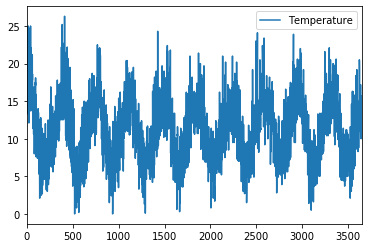

In [9]:
df.plot()

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa61be34e0>]],
      dtype=object)

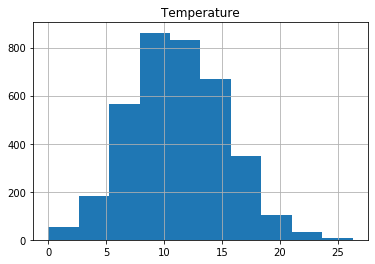

In [10]:
df.hist()

### Check minimum and maximum temperature
- use min() and max() methods

In [11]:
print('Minimum Value: ', df.min())

Minimum Value:  Temperature    0.0
dtype: float64


In [12]:
print('Maximum value: ', df.max())

Maximum value:  Temperature    26.3
dtype: float64


## Question 4

### Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [0]:
train_size=int(0.75 * len(df))
test_size=int(0.25 * len(df))

In [14]:
train, test = df[0:train_size], df[train_size: len(df)]
print(f'train dataset records: {len(train)}\ntest dataset records count: {len(test)}')

train dataset records: 2737
test dataset records count: 913


### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)

In [0]:
scaled_test = scaler.transform(test)

### Print scaled train and test data
- print only first 5 values

In [17]:
scaled_train[:5]

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       [0.55513308],
       [0.60076046]])

In [18]:
scaled_test[:5]

array([[0.22813688],
       [0.22053232],
       [0.18631179],
       [0.19011407],
       [0.31939163]])

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [0]:
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [0]:
lookback = 1
X_train, y_train = create_seq_data(scaled_train, lookback)
X_test, y_test = create_seq_data(scaled_test, lookback)

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [0]:
#Make it 3 Dimensional Data - needed for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Print shape of data
- print shape of X_train and X_test

In [22]:
print(f'X_train Shape: {X_train.shape}')
print(f'X_test Shape: {X_test.shape}')

X_train Shape: (2736, 1, 1)
X_test Shape: (912, 1, 1)


## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [0]:
batch_size = 1
look_back = 1

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(10, stateful=True, batch_input_shape=(batch_size, look_back, 1)))
model.add(tf.keras.layers.Dense(1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [0]:
model.compile(optimizer='adam', loss='mse')

### summarize your model
- use summary() method

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 10)                   480       
_________________________________________________________________
dense (Dense)                (1, 1)                    11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [27]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2736 samples, validate on 912 samples
Epoch 1/50
2736/2736 [==============================] - 7s 2ms/sample - loss: 0.0198 - val_loss: 0.0093
Epoch 2/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0102 - val_loss: 0.0093
Epoch 3/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101 - val_loss: 0.0092
Epoch 4/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101 - val_loss: 0.0091
Epoch 5/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101 - val_loss: 0.0091
Epoch 6/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101 - val_loss: 0.0091
Epoch 7/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101 - val_loss: 0.0093
Epoch 8/50
2736/2736 [==============================] - 6s 2ms/sample - loss: 0.0101 - val_loss: 0.0094
Epoch 9/50
2736/2736 [=====

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
trainPredict = model.predict(X_train)

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [0]:
model.reset_states()

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [0]:
testPredict = model.predict(X_test)

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
trainPredict = scaler.inverse_transform(trainPredict)

### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [0]:
testPredict = scaler.inverse_transform(testPredict)

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

In [0]:
train_mse = ((X_train - trainPredict) ** 2).mean()
train_rmse = np.sqrt(train_mse)

In [34]:
print(f'The Root Mean Squared Error of our train data predictions: {round(train_rmse, 3)}')

The Root Mean Squared Error of our train data predictions: 11.004


### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [0]:
test_mse = ((X_train - testPredict) ** 2).mean()
test_rmse = np.sqrt(test_mse)

In [36]:
print(f'The Root Mean Squared Error of our test data predictions: {round(test_rmse, 3)}')

The Root Mean Squared Error of our test data predictions: 11.152
